In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [3]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic

print_backend_info()

DESC version=0.13.0+1698.gf12602085.
Using JAX backend: jax version=0.5.0, jaxlib version=0.5.0, dtype=float64.
Using device: CPU, with 10.18 GB available memory.


In [11]:
eq = get("W7-X")
rho = 0.5
eq.pressure

PowerSeriesProfile at 0x79b1c1bbe510 (name=pressure, basis=PowerSeries at 0x79b1c146ef60 (L=12, M=0, N=0, NFP=1, sym=even, spectral_indexing=linear))

/home/yigit/Codes/DESC/desc/utils.py:563: UserWarning: pressure profile is not an even power series.
  warnings.warn(colored(msg, "yellow"), err)
/home/yigit/Codes/DESC/desc/utils.py:563: UserWarning: iota profile is not an even power series.
  warnings.warn(colored(msg, "yellow"), err)


(<Figure size 1152.32x480.135 with 3 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>, <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>, <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>], dtype=object))

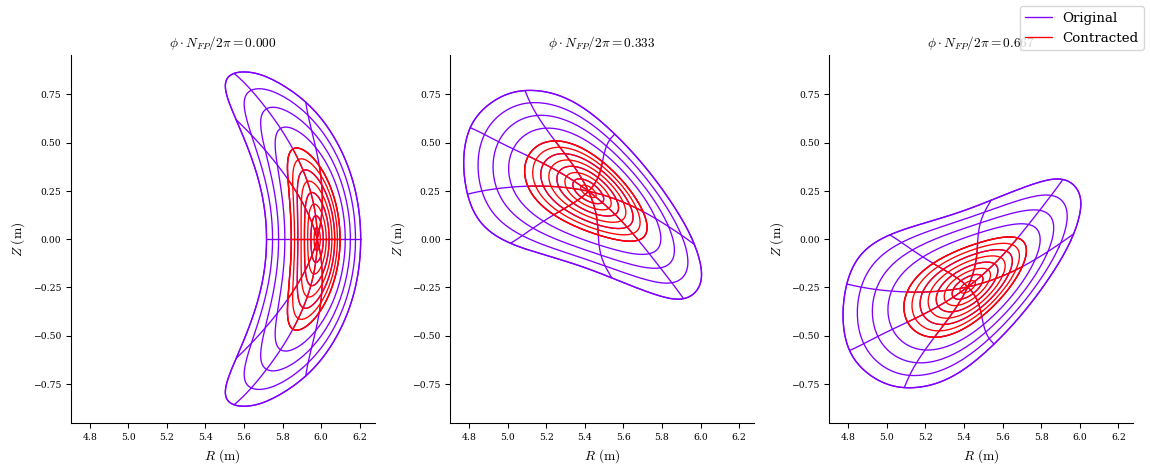

In [12]:
eq0 = contract_equilibrium(eq, inner_rho=0.5, copy=True)
plot_comparison(eqs=[eq, eq0], labels=["Original", "Contracted"], phi=3)

/home/yigit/Codes/DESC/desc/utils.py:563: UserWarning: pressure profile is not an even power series.
  warnings.warn(colored(msg, "yellow"), err)
/home/yigit/Codes/DESC/desc/utils.py:563: UserWarning: iota profile is not an even power series.
  warnings.warn(colored(msg, "yellow"), err)


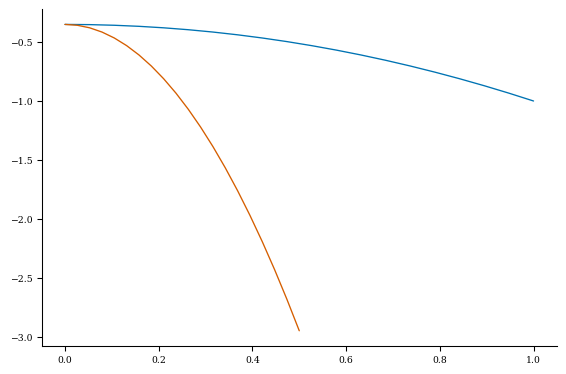

In [17]:
eq = get("ATF")
N = 20
rho = 0.5
eq0 = contract_equilibrium(eq, inner_rho=rho, copy=True)
x = np.linspace(0,1,N)
x2 = np.linspace(0,0.5,N)
p1 = eq.iota.compute(grid=LinearGrid(rho=N))
p2 = eq0.iota.compute(grid=LinearGrid(rho=N))
plt.plot(x, p1)
plt.plot(x2, p2)